Notebook modified form the Datacamp project https://learn.datacamp.com/projects/697

# Kidney Stones and Simpson's Paradox

## 1. A new look at an old research study

In 1986, a group of urologists in London published a research paper in <em>The British Medical Journal</em> that compared the effectiveness of two different methods to remove kidney stones. Treatment A was open surgery (invasive), and treatment B was percutaneous nephrolithotomy (less invasive). When they looked at the results from 700 patients, treatment B had a higher success rate. However, when they only looked at the subgroup of patients different kidney stone sizes, treatment A had a better success rate. What is going on here? This known statistical phenomenon is called Simpon’s paradox. Simpon's paradox occurs when trends appear in subgroups but disappear or reverse when subgroups are combined.

<img src="https://assets.datacamp.com/production/project_697/img/img1.jpg" height="500" width="500"></p>

In [34]:
# Load NumPy, pandas, pyplot from matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Use pandas' read_csv to load the datasets kidney_stone_data.csv into a dataframe
fi = './kidney_stone_data.csv'
df = pd.read_csv(fi)

# Take a look at the first few rows of the dataset
df.head()

,treatment,stone_size,success
0,B,large,1
1,A,large,1
2,A,large,0
3,A,large,1
4,A,large,1


## 2. Recreate the Treatment X Success summary table

The data contains three columns: `treatment` (A or B), `stone_size` (large or small) and `success` (0 = Failure or 1 = Success). 
To start, we want to know which treatment had a higher success rate regardless of stone size. 

Let's create a dataframe with the number of successes and frequency of success by each treatment.

For this we're going to use the `groupby` and the `agg` methods (Check out this [post](https://towardsdatascience.com/4-useful-tips-of-pandas-groupby-3744eefb1852) to learn about this methods).  

1. Group by treatment and success and aggregate by counting the items in each of this categories, i.e. treatment A, success 1, treatment A, success 0, treatment B, success 1 and treatment B, success 0.

2. For each treatment calculate the percentage of success 0 and 1.  

$$
\mbox{Percentage of successful cases with treatment A} = 100 \times \frac{\mbox{Number of successful cases with A}}{\mbox{Total number of cases with A}}
$$



In [36]:
# (1) group by treatment and success and aggregate by counting the items in each of this categories, i.e. treatement A, success 1
treatment_counts = df.groupby(['treatment', 'success']).agg({'success': 'count'})
# (2) 
treatment_counts['%'] = treatment_counts.groupby(level=0).apply(lambda x: 100 * x / x.sum())
treatment_counts

success          %
treatment success                    
A         0             77  22.000000
          1            273  78.000000
B         0             61  17.428571
          1            289  82.571429

#### Which treatment has a higher success?

Treatment B with ~82.50% in contrast to Treatment A with 78%.

## 3. Bringing stone size into the picture

From the treatment and success rate descriptive table, we saw that treatment B performed better on average compared to treatment A (82% vs. 78% success rate). 

Now, let's consider stone size and see what happens. 
We are going to stratify the data into small vs. large stone subcategories and compute the same success count and rate by treatment like we did in the previous task.


In [37]:
# (1) group by treatment, stone_size and success and aggregate by counting the items in each of this categories, i.e. treatement A, success 1
treatment_size_counts = df.groupby(['treatment', 'stone_size', 'success']).agg({ 'success': 'count'})
# (2) calculate the percentages, hint do the same as in the above example but setting the keyword agument level=[0,1]
treatment_size_counts['%'] = treatment_size_counts.groupby(level=[0,1]).apply(lambda x: 100 * x / x.sum())
treatment_size_counts

success          %
treatment stone_size success                    
A         large      0             71  26.996198
                     1            192  73.003802
          small      0              6   6.896552
                     1             81  93.103448
B         large      0             25  31.250000
                     1             55  68.750000
          small      0             36  13.333333
                     1            234  86.666667

Look at the success percentages for each treatment in the stone size groups.
**Which treatment has a higher success?**

Treatment A has a higher success rate with 73% for large and 93% for small stone sizes, while Treatment B has a success rate of about 69% for large and 87% for small kindey stone sizes.

## 4.  Summarize your observation using plots

Summarize your findings by plotting the success rate for each of the treatments, first ignoring the stone size and then taking the stone size into account.

Here, we use Seaborn's barplot on the original dataset `df` with the treatment in the `x` variable and the success rate in the `y` variable. We compute the success using the mean as estimator (recall that the mean of a data is just the ration of ones.) 
In the second plot, we distinguish the `stone_size` by using the `hue` parameter.

<AxesSubplot:xlabel='treatment', ylabel='success'>

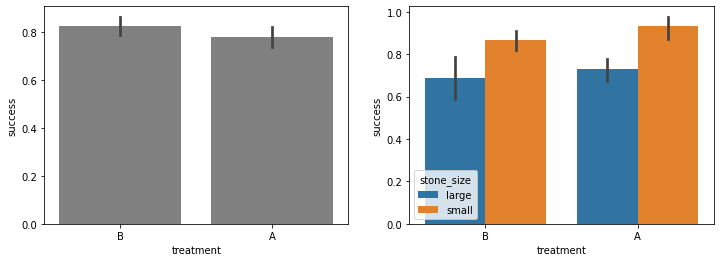

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='treatment', y='success', data=df, ax=ax[0], color='gray', estimator=np.mean)
sns.barplot(x='treatment', y='success', hue='stone_size', data=df, ax=ax[1], estimator=np.mean)

Now let's count the number of successes in each group by changing the estimator to `np.count_nonzero`

<AxesSubplot:xlabel='treatment', ylabel='success'>

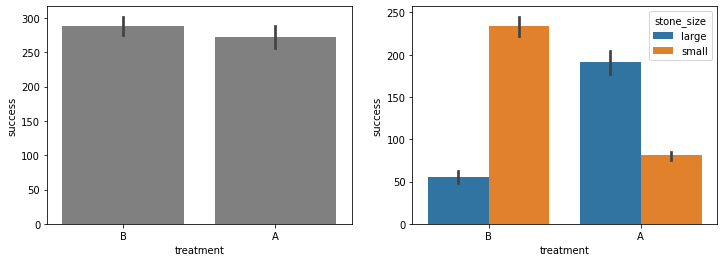

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='treatment', y='success', data=df, ax=ax[0], color='gray', estimator=np.count_nonzero)
sns.barplot(x='treatment', y='success', hue='stone_size', data=df, ax=ax[1], estimator=np.count_nonzero)

Describe what you observe in the figures

The left figure leaves the impression of a relatively even success rate on first glance, with a small lead of Treatment B. We can state that this is not a proper conclusion as: 1. Treatment A and B can have varying amounts of general treatments (treatment A has been used 400 times, treatment B only 300) and therefore, the *count* of success rates is insignificant. 2. the more granular populations of four grouped by the two independent variables *stone_size* and *treatment* indicate a more fluctuating success rate based on the population (stone_size + treatment). 

We are able to give a statement about a treatment's success rate by:
1. averaging both success rates based on large/small stone_size as indicated in Figure 2.
2. making four statements to each success rate for treatment+stone_size combination and deriving the favorability of treatment application based on that.